In [3]:
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1))

X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X,y, epochs=1000, verbose=0)
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print("입력데이터=%s, 예측결과=%s"%(Xnew[i], ynew[i]))

입력데이터=[0.29466096 0.30317302], 예측결과=[0.19883561]
입력데이터=[0.39445118 0.79390858], 예측결과=[0.7374848]
입력데이터=[0.02884127 0.6208843 ], 예측결과=[0.39385957]


In [7]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

np.random.seed(7)
dataset = np.loadtxt("pima.data", delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 데이터 분리입력
history = model.fit(X,Y, validation_split=0.33, epochs=150, batch_size=10)
scores = model.evaluate(X,Y)
print("\n%s : %.2f%%"%(model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 618us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 97us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6533 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 88us/step - loss: 0.6616 - accuracy: 0.6401 - val_loss: 0.6510 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 91us/step - loss: 0.6545 - accuracy: 0.6362 - val_loss: 0.6456 - val_accuracy: 0.6890
Epoch 5/150
514/514 [==============================] - 0s 89us/step - loss: 0.6456 - accuracy: 0.6420 - val_loss: 0.6361 - val_accuracy: 0.7047
Epoch 6/150
514/514 [==============================] - 0s 97us/step - loss: 0.6386 - accuracy: 0.6459 - val_loss: 0.6227 - val_accuracy: 0.

Epoch 55/150
514/514 [==============================] - 0s 87us/step - loss: 0.5309 - accuracy: 0.7393 - val_loss: 0.5546 - val_accuracy: 0.7165
Epoch 56/150
514/514 [==============================] - 0s 87us/step - loss: 0.5378 - accuracy: 0.7354 - val_loss: 0.5579 - val_accuracy: 0.7244
Epoch 57/150
514/514 [==============================] - 0s 92us/step - loss: 0.5402 - accuracy: 0.7471 - val_loss: 0.5597 - val_accuracy: 0.7480
Epoch 58/150
514/514 [==============================] - 0s 85us/step - loss: 0.5289 - accuracy: 0.7335 - val_loss: 0.5623 - val_accuracy: 0.7047
Epoch 59/150
514/514 [==============================] - 0s 91us/step - loss: 0.5435 - accuracy: 0.7198 - val_loss: 0.5454 - val_accuracy: 0.7480
Epoch 60/150
514/514 [==============================] - 0s 87us/step - loss: 0.5343 - accuracy: 0.7257 - val_loss: 0.5534 - val_accuracy: 0.7323
Epoch 61/150
514/514 [==============================] - 0s 87us/step - loss: 0.5326 - accuracy: 0.7354 - val_loss: 0.5583 - val_ac

514/514 [==============================] - 0s 89us/step - loss: 0.5195 - accuracy: 0.7490 - val_loss: 0.5215 - val_accuracy: 0.7717
Epoch 112/150
514/514 [==============================] - 0s 91us/step - loss: 0.5028 - accuracy: 0.7529 - val_loss: 0.5232 - val_accuracy: 0.7480
Epoch 113/150
514/514 [==============================] - 0s 85us/step - loss: 0.5098 - accuracy: 0.7432 - val_loss: 0.5131 - val_accuracy: 0.7717
Epoch 114/150
514/514 [==============================] - 0s 87us/step - loss: 0.5035 - accuracy: 0.7393 - val_loss: 0.5137 - val_accuracy: 0.7756
Epoch 115/150
514/514 [==============================] - 0s 87us/step - loss: 0.5051 - accuracy: 0.7568 - val_loss: 0.5093 - val_accuracy: 0.7795
Epoch 116/150
514/514 [==============================] - 0s 91us/step - loss: 0.5054 - accuracy: 0.7510 - val_loss: 0.5122 - val_accuracy: 0.7835
Epoch 117/150
514/514 [==============================] - 0s 93us/step - loss: 0.5086 - accuracy: 0.7510 - val_loss: 0.5437 - val_accuracy:

In [8]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


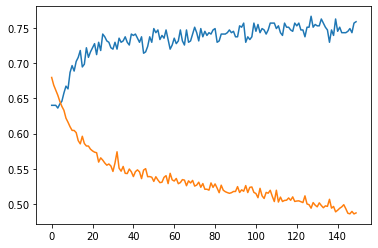

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

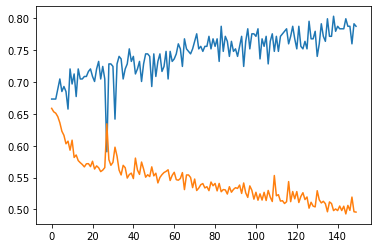

In [12]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.show()

# 분류

In [16]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

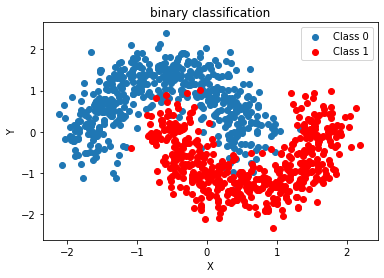

In [17]:
fig, ax = plt.subplots()
#          이 조건인 것들은     이 클라스에 담겨있다
ax.scatter(X[Y==0,0], X[Y==0,1], label='Class 0')
ax.scatter(X[Y==1,0], X[Y==1,1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

In [18]:
X_train.shape

(700, 2)

In [20]:
import keras
class CustomHistory(keras.callbacks.Callback): # 상속
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_Acc.append(logs.get('accuracy'))
        self.val_acc.append(lofs.get('val_accuracy'))

In [22]:
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

print(X_train0.shape, X_train0.dtype)
print(X_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000, 28, 28) uint8
(10000, 28, 28) uint8
(10000,) uint8


<function matplotlib.pyplot.show(*args, **kw)>

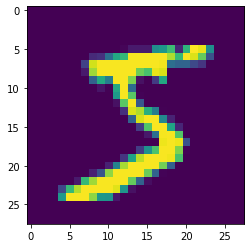

In [23]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [29]:
def create_model():
    model =Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

np.random.seed(7)
datasets = np.loadtxt('pima.csv', delimiter = ",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn = create_model, verbose=0)

In [32]:
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]

param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs =-1 )
grid_result = grid.fit(X,Y)
print("스코어: %f 사용한 조합: %s"%(grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean, stds, params):
    print("%f (%f) with : %r" %(mean, stdev, param))

스코어: 0.722723 사용한 조합: {'batch_size': 10, 'epochs': 100}
0.608047 (0.028341) with : {'batch_size': 10, 'epochs': 10}
0.691520 (0.047431) with : {'batch_size': 10, 'epochs': 50}
0.722723 (0.032556) with : {'batch_size': 10, 'epochs': 100}
0.615882 (0.041793) with : {'batch_size': 20, 'epochs': 10}
0.696690 (0.029378) with : {'batch_size': 20, 'epochs': 50}
0.690196 (0.045808) with : {'batch_size': 20, 'epochs': 100}
0.549469 (0.046499) with : {'batch_size': 40, 'epochs': 10}
0.664146 (0.041904) with : {'batch_size': 40, 'epochs': 50}
0.657550 (0.025569) with : {'batch_size': 40, 'epochs': 100}
0.613284 (0.019908) with : {'batch_size': 60, 'epochs': 10}
0.652449 (0.061473) with : {'batch_size': 60, 'epochs': 50}
0.667991 (0.066074) with : {'batch_size': 60, 'epochs': 100}
0.576725 (0.081410) with : {'batch_size': 80, 'epochs': 10}
0.608208 (0.075380) with : {'batch_size': 80, 'epochs': 50}
0.674501 (0.029803) with : {'batch_size': 80, 'epochs': 100}
0.495009 (0.073720) with : {'batch_size

In [33]:
init_mode =['uniform', 'lecun_uniform', 'normal', 'zero' ,'glorot_normal' ,'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign',' relu','tanh','sigmoid', 'hard_sigmoid','linear']

In [35]:
def create_model(init_mode, activation):
    model = Sequential()
    model.add(Dense(12, input_dim = 8, activation = activation))
    model.add(Dense(1, kernel_initializer = init_mode, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

np.random.seed(7)
datasets = np.loadtxt('pima.csv', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn = create_model, verbose=0)

In [36]:
param_grid = dict(init_mode = init_mode, activation = activation)
grid = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,Y)
print("스코어: %f 사용한 조합: %s"%(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with : %r"%(mean, stdev, param))

스코어: 0.656345 사용한 조합: {'activation': 'softsign', 'init_mode': 'uniform'}
0.611960 (0.095085) with : {'activation': 'softmax', 'init_mode': 'uniform'}
0.559944 (0.098311) with : {'activation': 'softmax', 'init_mode': 'lecun_uniform'}
0.601477 (0.056986) with : {'activation': 'softmax', 'init_mode': 'normal'}
0.651159 (0.052445) with : {'activation': 'softmax', 'init_mode': 'zero'}
0.584925 (0.130044) with : {'activation': 'softmax', 'init_mode': 'glorot_normal'}
0.483465 (0.125820) with : {'activation': 'softmax', 'init_mode': 'glorot_uniform'}
0.464825 (0.095916) with : {'activation': 'softmax', 'init_mode': 'he_normal'}
0.588728 (0.060215) with : {'activation': 'softmax', 'init_mode': 'he_uniform'}
0.477642 (0.121688) with : {'activation': 'softplus', 'init_mode': 'uniform'}
0.568033 (0.121469) with : {'activation': 'softplus', 'init_mode': 'lecun_uniform'}
0.550794 (0.112139) with : {'activation': 'softplus', 'init_mode': 'normal'}
0.621119 (0.022590) with : {'activation': 'softplus'

# 최적의 dropout, init_mode, optimizer을 찾기

In [42]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
init_mode =['uniform', 'lecun_uniform', 'normal', 'zero' ,'glorot_normal' ,'glorot_uniform', 'he_normal', 'he_uniform']
optimizer= ['softmax', 'softplus', 'softsign',' relu','tanh','sigmoid', 'hard_sigmoid','linear']
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
768/768 [==============================] - 0s 371us/step - loss: 0.6589 - accuracy: 0.6576
Epoch 2/100
768/768 [==============================] - 0s 92us/step - loss: 0.6277 - accuracy: 0.6732
Epoch 3/100
768/768 [==============================] - 0s 75us/step - loss: 0.6310 - accuracy: 0.6862
Epoch 4/100
768/768 [==============================] - 0s 73us/step - loss: 0.6068 - accuracy: 0.6914
Epoch 5/100
768/768 [==============================] - 0s 59us/step - loss: 0.6026 - accuracy: 0.7018
Epoch 6/100
768/768 [==============================] - 0s 92us/step - loss: 0.6061 - accuracy: 0.6862
Epoch 7/100
768/768 [==============================] - 0s 71us/step - loss: 0.6079 - accuracy: 0.6862
Epoch 8/100
768/768 [==============================] - 0s 71us/step - loss: 0.6052 - accuracy: 0.7018
Epoch 9/100
768/768 [==============================] - 0s 71us/step - loss: 0.5978 - accuracy: 0.6953
Epoch 10/100
768/768 [==============================] - 0s 75us/step - loss: 0.59

768/768 [==============================] - 0s 74us/step - loss: 0.5559 - accuracy: 0.7318
Epoch 81/100
768/768 [==============================] - 0s 84us/step - loss: 1.0586 - accuracy: 0.7018
Epoch 82/100
768/768 [==============================] - 0s 73us/step - loss: 0.5576 - accuracy: 0.7240
Epoch 83/100
768/768 [==============================] - 0s 69us/step - loss: 0.5656 - accuracy: 0.7214
Epoch 84/100
768/768 [==============================] - 0s 71us/step - loss: 0.5768 - accuracy: 0.7227
Epoch 85/100
768/768 [==============================] - 0s 60us/step - loss: 0.5688 - accuracy: 0.7148
Epoch 86/100
768/768 [==============================] - 0s 89us/step - loss: 0.5619 - accuracy: 0.7279
Epoch 87/100
768/768 [==============================] - 0s 70us/step - loss: 0.5549 - accuracy: 0.7214
Epoch 88/100
768/768 [==============================] - 0s 55us/step - loss: 0.5694 - accuracy: 0.6940
Epoch 89/100
768/768 [==============================] - 0s 88us/step - loss: 0.5762 - 

0.649740 (0.013279) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_normal', 'optimizer': 'sigmoid'}
0.640625 (0.015947) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_normal', 'optimizer': 'hard_sigmoid'}
0.000000 (0.000000) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_normal', 'optimizer': 'linear'}
0.657552 (0.028940) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'softmax'}
0.010417 (0.014731) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'relu'}
0.000000 (0.000000) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'softplus'}
0.559896 (0.141826) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'softsign'}
0.250000 (0.225505) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'tanh'}
0.630208 (0.019488) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform', 'optimizer': 'sigmoid'}
0.641927 (0.043067) with: {'dropout_rate': 0.2, 'init_mode': 'glorot_uniform

In [43]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='var_accuracy')

def create_model(init_mode='uniform', optimizer='relu', dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate)) # 몇개를 생략하며 과적합을 방지해주는 아이
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
np.random.seed(seed)
dataset = np.loadtxt('pima.csv', delimiter=",")

X = dataset[:, 0:8]
Y = dataset[:, 8]

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
dropout_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
init_mode =['uniform', 'lecun_uniform', 'normal', 'zero' ,'glorot_normal' ,'glorot_uniform', 'he_normal', 'he_uniform']
optimizer= ['softmax', 'softplus', 'softsign',' relu','tanh','sigmoid', 'hard_sigmoid','linear']
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,Y, **fit_params)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev,param))

Epoch 1/100
768/768 [==============================] - 0s 401us/step - loss: 0.6589 - accuracy: 0.6576
Epoch 2/100
768/768 [==============================] - 0s 77us/step - loss: 0.6277 - accuracy: 0.6732
Epoch 3/100
768/768 [==============================] - 0s 78us/step - loss: 0.6310 - accuracy: 0.6862
Epoch 4/100
768/768 [==============================] - 0s 74us/step - loss: 0.6068 - accuracy: 0.6914
Epoch 5/100
768/768 [==============================] - 0s 77us/step - loss: 0.6026 - accuracy: 0.7018
Epoch 6/100
768/768 [==============================] - 0s 79us/step - loss: 0.6061 - accuracy: 0.6875
Epoch 7/100
768/768 [==============================] - 0s 74us/step - loss: 0.6079 - accuracy: 0.6862
Epoch 8/100
768/768 [==============================] - 0s 74us/step - loss: 0.6054 - accuracy: 0.6979
Epoch 9/100
768/768 [==============================] - 0s 71us/step - loss: 0.5973 - accuracy: 0.6927
Epoch 10/100
768/768 [==============================] - 0s 82us/step - loss: 0.59

768/768 [==============================] - 0s 76us/step - loss: 0.5682 - accuracy: 0.7253
Epoch 81/100
768/768 [==============================] - 0s 91us/step - loss: 0.5642 - accuracy: 0.7005
Epoch 82/100
768/768 [==============================] - 0s 61us/step - loss: 0.5608 - accuracy: 0.7161
Epoch 83/100
768/768 [==============================] - 0s 66us/step - loss: 0.5648 - accuracy: 0.7109
Epoch 84/100
768/768 [==============================] - 0s 96us/step - loss: 0.5583 - accuracy: 0.7292
Epoch 85/100
768/768 [==============================] - 0s 81us/step - loss: 0.5561 - accuracy: 0.7148
Epoch 86/100
768/768 [==============================] - 0s 62us/step - loss: 0.5537 - accuracy: 0.7279
Epoch 87/100
768/768 [==============================] - 0s 82us/step - loss: 0.5485 - accuracy: 0.7344
Epoch 88/100
768/768 [==============================] - 0s 96us/step - loss: 0.5538 - accuracy: 0.7318
Epoch 89/100
768/768 [==============================] - 0s 79us/step - loss: 0.5553 - 